In [1]:
from thesis_v2.data.prepared import cadena_plos_cb19

In [2]:
imgs = cadena_plos_cb19.images()

In [3]:
data = cadena_plos_cb19.get_raw_pkl()

In [4]:
data['image_numbers'].ravel().shape

(7250,)

In [5]:
import numpy as np
np.array_equal(data['image_ids'].ravel(), np.arange(1,7251))

True

In [6]:
imgs.shape

(7250, 1, 40, 40)

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

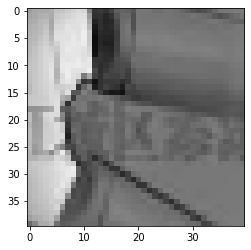

In [8]:
plt.imshow(imgs[0][0], vmin=0,vmax=255, cmap='gray')

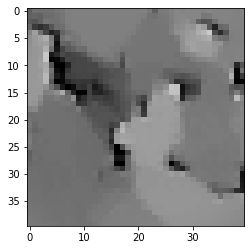

In [9]:
plt.imshow(imgs[1][0], vmin=0,vmax=255, cmap='gray')

In [10]:
b=cadena_plos_cb19.get_neural_data()

In [11]:
b.shape

(7250, 115)

In [12]:
b.mean(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
b.min()

0.0

In [14]:
b.max()

43.355481727574755

In [15]:
(b==0).mean()

0.20256431784107945

(array([2.63583e+05, 1.80386e+05, 1.56135e+05, 1.01747e+05, 5.79010e+04,
        2.87860e+04, 1.36800e+04, 8.74500e+03, 7.09200e+03, 3.36200e+03,
        1.95600e+03, 2.92600e+03, 1.71400e+03, 1.08400e+03, 6.61000e+02,
        6.21000e+02, 5.78000e+02, 3.61000e+02, 2.95000e+02, 2.09000e+02,
        2.46000e+02, 1.83000e+02, 3.55000e+02, 2.16000e+02, 1.27000e+02,
        6.30000e+01, 7.40000e+01, 5.30000e+01, 7.10000e+01, 2.60000e+01,
        3.60000e+01, 4.10000e+01, 1.90000e+01, 8.60000e+01, 1.60000e+01,
        7.50000e+01, 2.40000e+01, 1.10000e+01, 6.00000e+00, 4.00000e+00,
        9.00000e+00, 6.00000e+00, 1.10000e+01, 1.00000e+00, 4.60000e+01,
        1.20000e+01, 1.00000e+00, 2.90000e+01, 3.00000e+00, 3.00000e+00,
        5.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00,
        1.20000e+01, 2.00000e+00, 1.00000e+00, 0.00000e+00, 2.20000e+01,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        2.00000e+00, 4.00000e+00, 0.00000e+00, 1.00

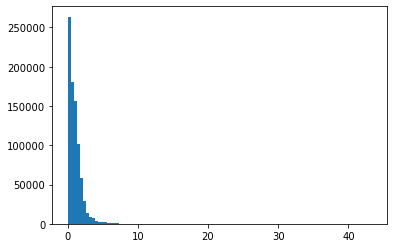

In [16]:
plt.hist(b.ravel(), bins=100)

In [17]:
c = cadena_plos_cb19.get_indices(seed=0)

In [18]:
for z in c:
    print(z, c[z].shape)

labels (7250,)
groups (7250,)
idx_train (4640,)
idx_val (1160,)
idx_test (1450,)


In [19]:
s1=set(c['groups'][c['idx_train']])
s2=set(c['groups'][c['idx_val']])
s3=set(c['groups'][c['idx_test']])

In [20]:
assert (s1 | s2 | s3) == set(range(1,1450+1))
assert (s1 & s2) == set()
assert (s2 & s3) == set()
assert (s1 & s3) == set()

In [21]:
data_all = cadena_plos_cb19.get_data(px_kept=80,final_size=40,seed=0)

In [22]:
for zzzz in data_all:
    print(zzzz.dtype, zzzz.shape, zzzz.mean(), zzzz.std(), zzzz.min(), zzzz.max())

float32 (4640, 1, 40, 40) 112.3707 41.85086 0.0 255.0
float64 (4640, 115) 0.9997886347847456 1.1200904471614856 0.0 43.355481727574755
float32 (1160, 1, 40, 40) 112.594635 42.224922 0.0 255.0
float64 (1160, 115) 0.9958200794879527 1.1349541115933623 0.0 43.355481727574755
float32 (1450, 1, 40, 40) 112.25153 41.926292 0.0 255.0
float64 (1450, 115) 1.0040203050984517 1.1187814728153749 0.0 36.40602582496413


In [23]:
data_all_scaled = cadena_plos_cb19.get_data(px_kept=80,final_size=40,seed=0,scale=0.5)

In [24]:
for zzzz2 in data_all_scaled:
    print(zzzz2.dtype, zzzz2.shape, zzzz2.mean(), zzzz2.std(), zzzz2.min(), zzzz2.max())

float32 (4640, 1, 40, 40) 112.3707 41.85086 0.0 255.0
float64 (4640, 115) 0.4998943173923728 0.5600452235807428 0.0 21.677740863787378
float32 (1160, 1, 40, 40) 112.594635 42.224922 0.0 255.0
float64 (1160, 115) 0.49791003974397635 0.5674770557966812 0.0 21.677740863787378
float32 (1450, 1, 40, 40) 112.25153 41.926292 0.0 255.0
float64 (1450, 115) 0.5020101525492259 0.5593907364076874 0.0 18.203012912482066
